<h1 style='color: orange; font-weight: bold; text-align: center;'>Mental Healthier Classifier</h1>

<p style='text-align: center;'> This notebook aims to classify sentences on mental health - whether is healthy or not. It is based on the Mental Health Corpus dataset provided by Reihaneh Namdari on Kaggle. </p>

### Setting up

In [80]:
import matplotlib.pyplot as plt
from zipfile import ZipFile
import seaborn as sns
import pandas as pd
import numpy as np

plt.style.use('ggplot')

FILE = './data/mental_health.csv.zip'

zf = ZipFile(FILE)

zf.extractall('./data/')

uri = './data/mental_health.csv'

df = pd.read_csv(uri)

### Quick EDA

In [69]:
print('Dataframe shape:', df.shape, '\n')

print(df.info(), '\n')

df.head(3)

Dataframe shape: (27977, 2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27977 entries, 0 to 27976
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27977 non-null  object
 1   label   27977 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 437.3+ KB
None 



,text,label
0,dear american teens question dutch person hear...,0
1,nothing look forward lifei dont many reasons k...,1
2,music recommendations im looking expand playli...,0


In [99]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27977.0,0.494621,0.49998,0.0,0.0,0.0,1.0,1.0


In [70]:
print('Count:\n{}\n'.format(df.label.value_counts()))
print('Percentage:\n{}'.format(df.label.value_counts(normalize=True)))

Count:
0    14139
1    13838
Name: label, dtype: int64

Percentage:
0    0.505379
1    0.494621
Name: label, dtype: float64


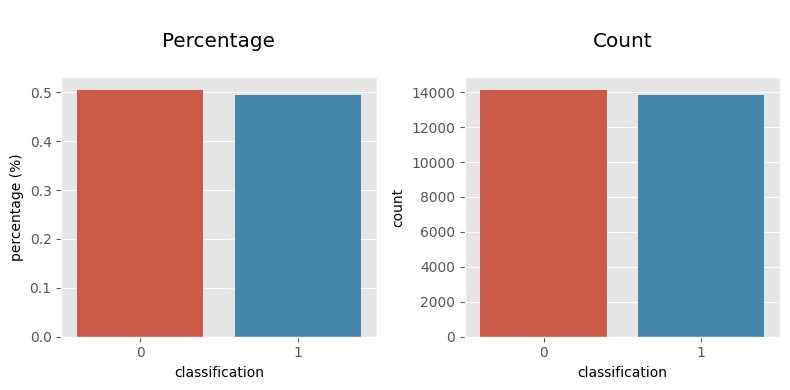

In [96]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(
  data=df.label.value_counts(normalize=True).reset_index(), 
  x='index', 
  y='label',
  ax=axs[0]
)

sns.barplot(
  data=df.label.value_counts(normalize=False).reset_index(), 
  x='index', 
  y='label',
  ax=axs[1]
)

axs[0].set_title('\nPercentage\n')
axs[0].set_xlabel('classification')
axs[0].set_ylabel('percentage (%)')

axs[1].set_title('\nCount\n')
axs[1].set_xlabel('classification')
axs[1].set_ylabel('count')

plt.tight_layout()

plt.show()

### Tokenization

In [255]:
from nltk import word_tokenize
import nltk

def find_entry(index: int):
  if type(index) == int:
    print('Text:\n{}'.format(df.text.values[index]), '\n')
    print('Label:\n{}'.format(df.label.values[index]))
  else:
    raise ValueError
  
find_entry(0) 

Text:
dear american teens question dutch person heard guys get way easier things learn age us sooooo thth graders like  right guys learn math 

Label:
0


In [182]:
tokens = nltk.word_tokenize(df.text.values[100])
tagged = nltk.pos_tag(tokens)

print(f'{tokens[:10]} \n\n {tagged[:10]}')

['driven', 'redflagi', 'think', 'partners', 'negativity', 'driving', 'redflag', 'started', 'months', 'ago'] 

 [('driven', 'RB'), ('redflagi', 'JJ'), ('think', 'VBP'), ('partners', 'NNS'), ('negativity', 'JJ'), ('driving', 'VBG'), ('redflag', 'NN'), ('started', 'VBD'), ('months', 'NNS'), ('ago', 'IN')]


In [212]:
nouns, verbs = list([]), list([])

for i, row in tqdm(df.iterrows(), total=len(df)):
  tokens = Paralel(n_jobs=-1)(delayed(find_entry)(i))
  
  
print(f'{nouns}\n\n{verbs}')

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 


nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 

100%|██████████| 27977/27977 [00:04<00:00, 6575.94it/s]

nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going feel like nothing keeps going next day makes want hang myself
nothing look forward lifei dont many reasons keep going 